Сервис  “Мой Чемпион” помогает спортивным школам фигурного катания, тренерам мониторить результаты своих подопечных и планировать дальнейшее развитие спортсменов.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
total_scores = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/total_scores.csv")
tournament_scores = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/tournament_scores.csv")
tournaments = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/total_scores.csv")
units = pd.read_csv("C:/Users/Андрей Владимирович/Documents/Jupyter/Мой Чемпион/data_01_predict_progress/units.csv")

In [16]:
display(total_scores, tournament_scores, tournaments, units)

,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
0,442027,304,4785,47.20,43.47,102.70,59.23,0.0,17,1,Короткая программа,x Надбавка за прыжки во второй половине програ...,2,293.74,2
1,442028,604,4785,45.40,46.71,101.19,54.48,0.0,18,2,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,1,294.75,1
2,442029,409,4785,44.00,46.82,99.20,52.38,0.0,6,3,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,4,285.57,4
3,442030,524,4785,46.20,44.86,91.84,47.98,-1.0,3,4,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,3,292.42,3
4,442031,412,4785,44.20,42.59,89.73,48.14,-1.0,15,5,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,6,265.34,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21296,462405,34979,7116,21.67,26.02,46.62,21.10,-0.5,6,20,Произвольная программа,q Прыжок приземлён в четверть x Надбавка за пр...,20,71.66,20
21297,462406,1995,7116,23.20,25.50,46.22,21.22,-0.5,7,21,Произвольная программа,q Прыжок приземлён в четверть e Явно неправиль...,21,71.27,21
21298,462407,34841,7116,21.83,25.00,45.46,20.96,-0.5,5,22,Произвольная программа,q Прыжок приземлён в четверть << Пониженный пр...,22,70.49,22
21299,462408,34980,7116,21.17,26.00,45.24,20.74,-1.5,2,23,Произвольная программа,q Прыжок приземлён в четверть < Недокрученный ...,24,68.22,24


,id,total_score_id,title,decrease,base_score,goe,avg_score
0,1,1,2A,NaN,3.3,0.66,3.96
1,2,1,3F+3Lo,NaN,10.2,-0.11,10.09
2,3,1,3Lz,NaN,0.0,-1.30,5.19
3,4,1,CCoSp4,NaN,3.5,0.56,4.06
4,5,1,FCSp4,NaN,3.2,0.64,3.84
...,...,...,...,...,...,...,...
172153,352008,463407,CCoSp3,NaN,3.0,0.60,3.60
172154,352009,463407,2Lz,NaN,2.1,0.00,2.10
172155,352010,463407,2Lo,NaN,1.7,0.23,1.93
172156,352011,463407,StSq2,NaN,2.6,0.52,3.12


,id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
0,442027,304,4785,47.20,43.47,102.70,59.23,0.0,17,1,Короткая программа,x Надбавка за прыжки во второй половине програ...,2,293.74,2
1,442028,604,4785,45.40,46.71,101.19,54.48,0.0,18,2,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,1,294.75,1
2,442029,409,4785,44.00,46.82,99.20,52.38,0.0,6,3,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,4,285.57,4
3,442030,524,4785,46.20,44.86,91.84,47.98,-1.0,3,4,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,3,292.42,3
4,442031,412,4785,44.20,42.59,89.73,48.14,-1.0,15,5,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,6,265.34,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21296,462405,34979,7116,21.67,26.02,46.62,21.10,-0.5,6,20,Произвольная программа,q Прыжок приземлён в четверть x Надбавка за пр...,20,71.66,20
21297,462406,1995,7116,23.20,25.50,46.22,21.22,-0.5,7,21,Произвольная программа,q Прыжок приземлён в четверть e Явно неправиль...,21,71.27,21
21298,462407,34841,7116,21.83,25.00,45.46,20.96,-0.5,5,22,Произвольная программа,q Прыжок приземлён в четверть << Пониженный пр...,22,70.49,22
21299,462408,34980,7116,21.17,26.00,45.24,20.74,-1.5,2,23,Произвольная программа,q Прыжок приземлён в четверть < Недокрученный ...,24,68.22,24


,id,color,school_id
0,9474,green,244.0
1,733,green,203.0
2,734,green,235.0
3,735,green,168.0
4,736,green,168.0
...,...,...,...
4591,10122,green,198.0
4592,5108,green,62.0
4593,5109,green,27.0
4594,5110,green,62.0


In [18]:
# Выполнение объединений
# Начинаем с units, так как у него наименьшее количество строк
final_df = units.copy()  # Начинаем с units как наш базовый DataFrame

# Объединяем с tournament_scores
final_df = final_df.merge(tournament_scores, on='id', how='left')

# Объединяем с total_scores
final_df = final_df.merge(total_scores, on='id', how='left')

# Объединяем с tournaments
final_df = final_df.merge(tournaments, on='id', how='left')

final_df

,id,color,school_id,total_score_id,title,decrease,base_score_x,goe,avg_score,unit_id_x,...,total_score_y,elements_score_y,decreasings_score_y,starting_place_y,place_y,segment_name_y,info_y,overall_place_y,overall_total_score_y,overall_place_str_y
0,9474,green,244.0,4355.0,ChSq1,NaN,3.0,1.20,4.20,496.0,...,67.75,35.77,0.0,12.0,13.0,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,13.0,201.03,NaN
1,733,green,203.0,732.0,2A+1Eu+2S,NaN,0.0,-0.33,5.28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,734,green,235.0,732.0,2Lo,NaN,1.7,0.00,1.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,735,green,168.0,732.0,2T,NaN,0.0,0.00,1.43,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,736,green,168.0,732.0,3S<<,F,1.3,-0.65,0.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,10122,green,198.0,4432.0,3Lze<,F,0.0,-1.77,2.12,1615.0,...,98.02,50.54,0.0,19.0,9.0,Прoизвольная прoграмма,<< Пониженный прыжок ! Неясное ребро на толчке...,9.0,146.78,NaN
4592,5108,green,62.0,3856.0,FSSp4,NaN,3.0,0.48,3.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4593,5109,green,27.0,3857.0,3T+2T,NaN,5.5,0.17,5.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4594,5110,green,62.0,3857.0,3F,NaN,5.3,0.00,5.30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def data_review(df):
    """
    Функция для проведения полноценного обзора данных из датафрейма.

    Параметры:
    - df: Датафрейм с данными.

    Возвращает:
    - Вывод информации о датафрейме,
    - проверку пропусков,
    - визуализацию распределения данных количественных столбцов и
    - уникальные значения категориальных столбцов.
    """
    # Вывод первых нескольких строк датафрейма
    print("Первые несколько строк датафрейма:")
    display(df.head())

    # Вывод информации о датафрейме
    print("\nИнформация о датафрейме:")
    print(df.info())

    # Проверка пропусков
    print("\nПроверка пропусков:")
    print("Абсолютные пропуски:")
    print(df.isnull().sum())
    print("Относительные пропуски:")
    print(df.isnull().sum() / len(df) * 100)

    # Подсчет количества столбцов с пропущенными значениями
    null_columns = df.isnull().sum()

    # Отфильтровываем столбцы с пропущенными значениями и сортируем их по возрастанию количества пропущенных значений
    null_columns_filtered = null_columns[null_columns > 0].sort_values()

    # Визуализация количества пропущенных значений, если пропуски есть хотя бы в одном столбце
    if not null_columns_filtered.empty:
        print("\nВизуализация количества пропущенных значений:")
        plt.figure(figsize=(15, 8))
        sns.barplot(
            x=null_columns_filtered,
            y=null_columns_filtered.index,
            color="tab:red",
            alpha=0.8,
        )
        plt.xlabel(
            "Количество пропущенных значений", fontsize=12, color="DarkSlateGray"
        )
        plt.ylabel("Столбцы", fontsize=12, color="DarkSlateGray")
        plt.title(
            "Количество пропущенных значений по столбцам",
            fontsize=15,
            color="DarkSlateGray",
        )
        plt.minorticks_on()
        plt.grid(which="minor", linestyle=":")
        plt.grid(True)
        plt.show()
        display(
            pd.DataFrame(df.isna().mean() * 100, columns=["Процент пропусков"])
            .loc[df.isna().mean() * 100 != 0]
            .sort_values(by="Процент пропусков")
            .style.format({"Процент пропусков": "{:.2f}%"})
            .background_gradient("coolwarm")
        )
    else:
        print("\nВ датафрейме пропущенных значений нет.")

    # Визуализация распределения данных количественных столбцов
    print("\nВизуализация распределения данных количественных столбцов:")
    for col in df.select_dtypes(include=["float64", "int64"]).columns:
        print(f"{col}:")
        if df[col].std() == 0:  # Проверяем, однородны ли значения в столбце
            print(
                f"\033[31mВ столбце {col} одно и то же значение, график не строится.\033[0m"
            )
            continue  # Пропускаем построение графика для этого столбца
        plt.figure(figsize=(15, 8))
        # Первый график - гистограмма
        plt.subplot(2, 1, 1)
        sns.histplot(data=df[col], kde=True, color="tab:green", alpha=0.8, label=col)
        plt.minorticks_on()
        plt.grid(which="minor", linestyle=":")
        plt.grid(True)
        plt.xlabel("")
        plt.ylabel("Частота", fontsize=12, color="DarkSlateGray")
        plt.legend()
        # Второй график - боксплот
        plt.subplot(2, 1, 2)
        sns.boxplot(data=df[[col]], orient="horizontal", palette=["tab:green"])
        plt.minorticks_on()
        plt.grid(which="minor", linestyle=":")
        plt.grid(True)
        plt.xlabel("Значения", fontsize=12, color="DarkSlateGray")
        plt.ylabel("")
        plt.suptitle(
            f"Распределение данных для {col}", fontsize=15, color="DarkSlateGray"
        )
        plt.show()
        # Вывод статистической информации для количественного столбца
        describ = df[col].describe()
        print(describ)

    # Визуализация уникальных значений категориальных столбцов
    print("\nВизуализация уникальных значений категориальных столбцов:")
    for col in df.select_dtypes(include=["object"]).columns:
        unique_values = df[col].nunique()
        print(f"{col}:")
        print("Количество категорий:", df[col].nunique())

        if unique_values <= 40:
            plt.figure(figsize=(15, 5))
            values = df[col].value_counts().values
            keys = df[col].value_counts().index
            plt.barh(keys, values, color="tab:blue", alpha=0.8, label=col)
            plt.xlabel("Частота", fontsize=12, color="DarkSlateGray")
            plt.ylabel("Уникальные значения", fontsize=12, color="DarkSlateGray")
            plt.suptitle(
                f"Уникальные значения для {col}", fontsize=15, color="DarkSlateGray"
            )
            plt.minorticks_on()
            plt.grid(which="minor", linestyle=":")
            plt.grid(True)
            plt.show()
        else:
            print(
                f"Слишком много уникальных значений ({unique_values}) для {col}, график не построен."
            )

        # Вывод уникальных значений в табличном виде
        print("Уникальные значения:")
        print(df[col].value_counts())

Первые несколько строк датафрейма:


,id,color,school_id,total_score_id,title,decrease,base_score_x,goe,avg_score,unit_id_x,...,total_score_y,elements_score_y,decreasings_score_y,starting_place_y,place_y,segment_name_y,info_y,overall_place_y,overall_total_score_y,overall_place_str_y
0,9474,green,244.0,4355.0,ChSq1,NaN,3.0,1.20,4.20,496.0,...,67.75,35.77,0.0,12.0,13.0,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,13.0,201.03,NaN
1,733,green,203.0,732.0,2A+1Eu+2S,NaN,0.0,-0.33,5.28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,734,green,235.0,732.0,2Lo,NaN,1.7,0.00,1.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,735,green,168.0,732.0,2T,NaN,0.0,0.00,1.43,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,736,green,168.0,732.0,3S<<,F,1.3,-0.65,0.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4596 entries, 0 to 4595
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4596 non-null   int64  
 1   color                  4595 non-null   object 
 2   school_id              4007 non-null   float64
 3   total_score_id         4223 non-null   float64
 4   title                  4223 non-null   object 
 5   decrease               937 non-null    object 
 6   base_score_x           4223 non-null   float64
 7   goe                    4223 non-null   float64
 8   avg_score              4223 non-null   float64
 9   unit_id_x              1591 non-null   float64
 10  tournament_id_x        1591 non-null   float64
 11  base_score_y           1591 non-null   float64
 12  components_score_x     1591 non-null   float64
 13  total_score_x          1591 non-null   float64
 14  elements_score_x       1591 no

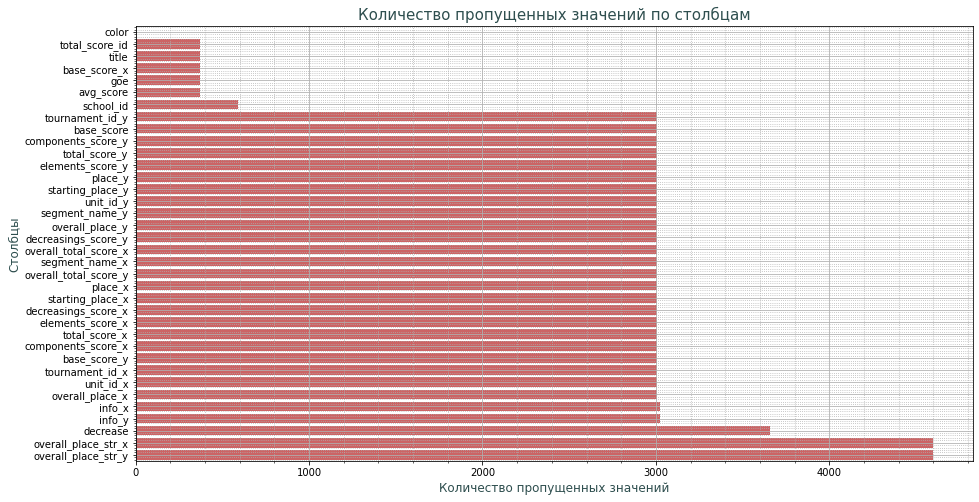

,Процент пропусков
color,0.02%
total_score_id,8.12%
title,8.12%
base_score_x,8.12%
goe,8.12%
avg_score,8.12%
school_id,12.82%
tournament_id_y,65.38%
base_score,65.38%
components_score_y,65.38%



Визуализация распределения данных количественных столбцов:
id:


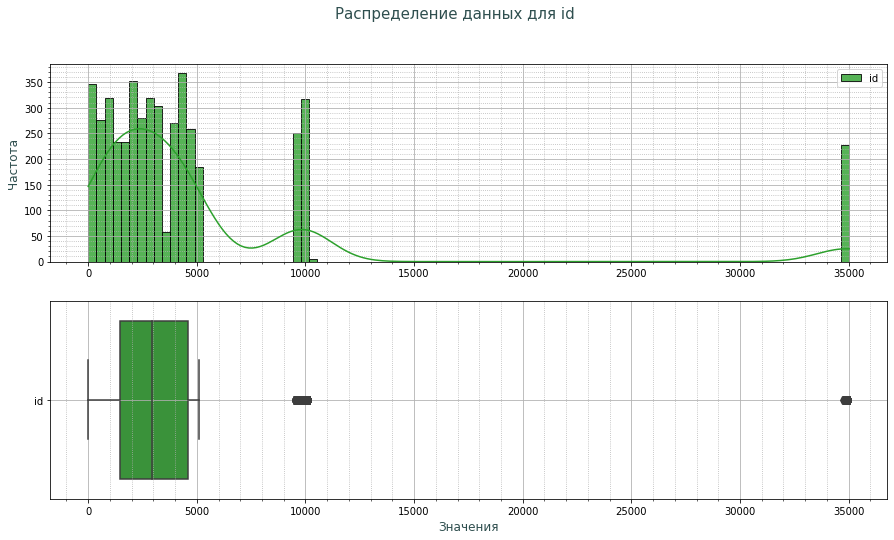

count     4596.000000
mean      5016.516971
std       7355.726664
min          1.000000
25%       1476.750000
50%       2953.500000
75%       4615.250000
max      35024.000000
Name: id, dtype: float64
school_id:


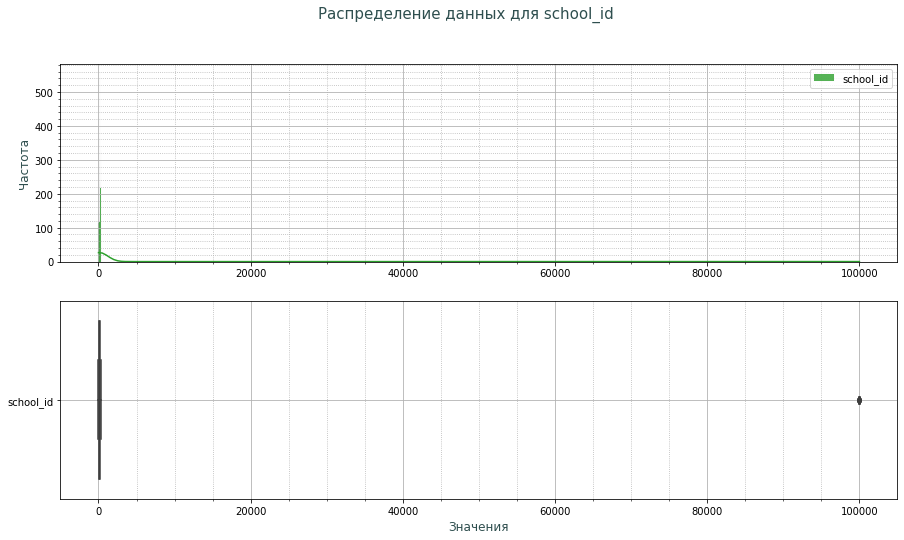

count     4007.000000
mean       464.135762
std       5679.988355
min          1.000000
25%         62.000000
50%        117.000000
75%        206.000000
max      99999.000000
Name: school_id, dtype: float64
total_score_id:


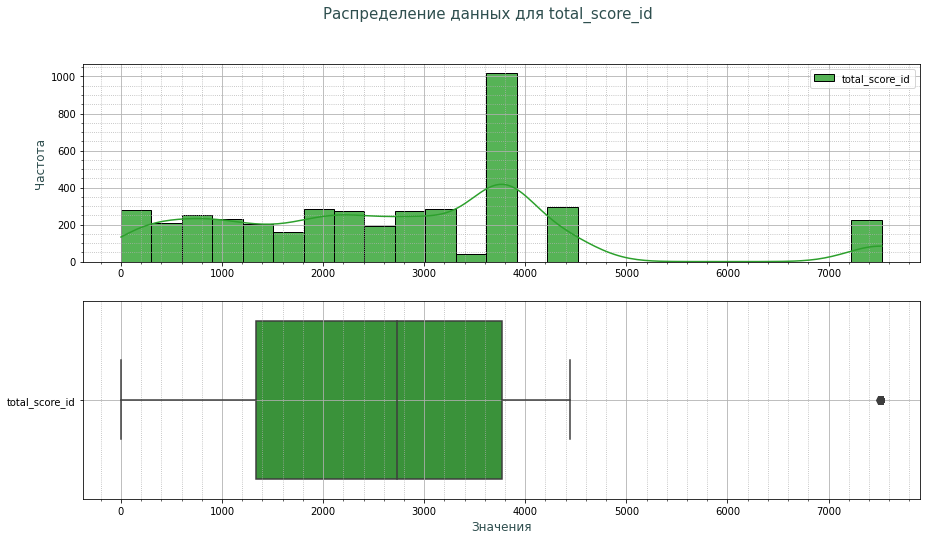

count    4223.000000
mean     2707.128582
std      1732.914422
min         1.000000
25%      1333.000000
50%      2735.000000
75%      3773.000000
max      7528.000000
Name: total_score_id, dtype: float64
base_score_x:


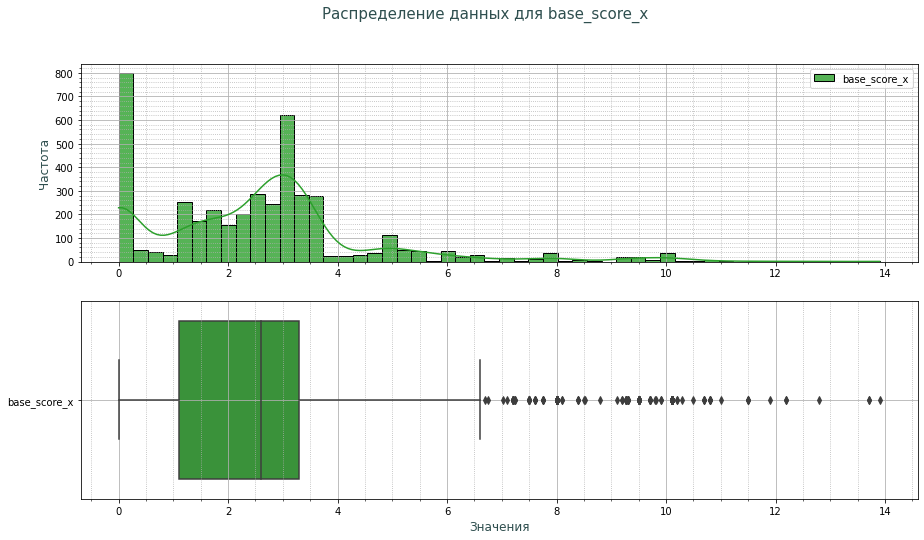

count    4223.000000
mean        2.559140
std         2.082128
min         0.000000
25%         1.100000
50%         2.600000
75%         3.300000
max        13.900000
Name: base_score_x, dtype: float64
goe:


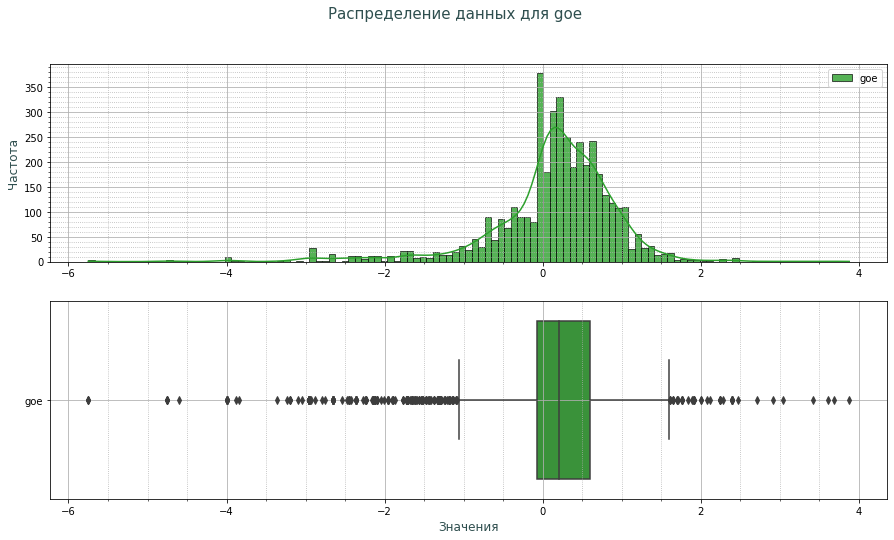

count    4223.000000
mean        0.138376
std         0.820932
min        -5.750000
25%        -0.070000
50%         0.210000
75%         0.600000
max         3.880000
Name: goe, dtype: float64
avg_score:


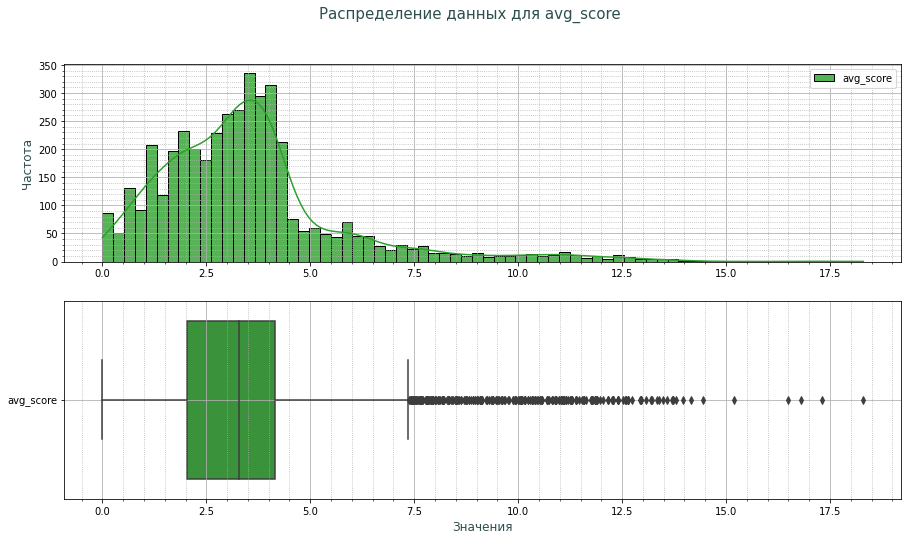

count    4223.000000
mean        3.532872
std         2.341381
min         0.000000
25%         2.030000
50%         3.280000
75%         4.160000
max        18.300000
Name: avg_score, dtype: float64
unit_id_x:


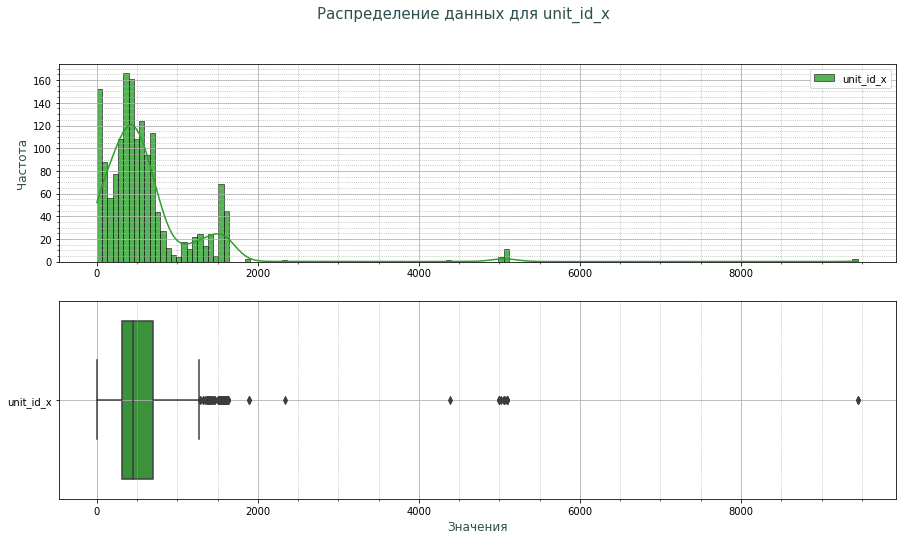

count    1591.000000
mean      609.037084
std       691.528973
min         1.000000
25%       307.500000
50%       454.000000
75%       693.000000
max      9450.000000
Name: unit_id_x, dtype: float64
tournament_id_x:


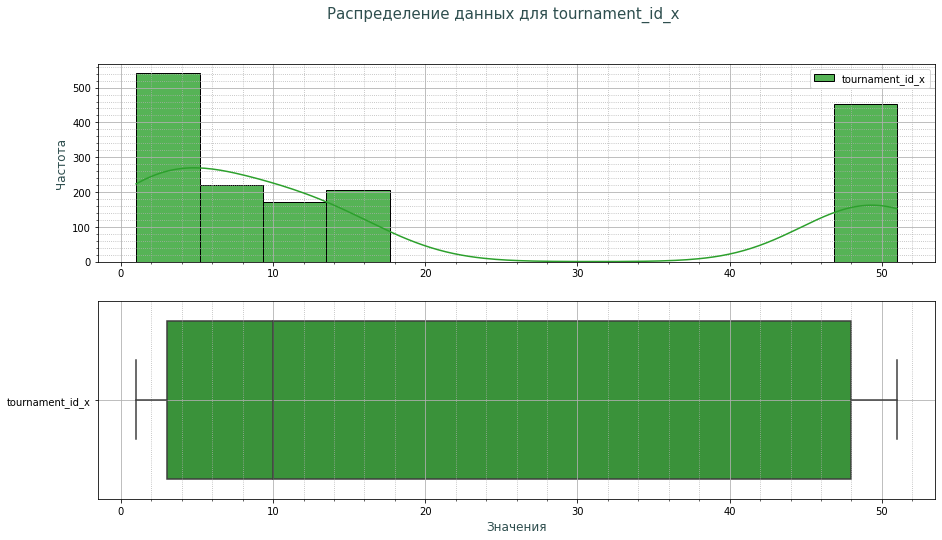

count    1591.000000
mean       18.931490
std        19.653341
min         1.000000
25%         3.000000
50%        10.000000
75%        48.000000
max        51.000000
Name: tournament_id_x, dtype: float64
base_score_y:


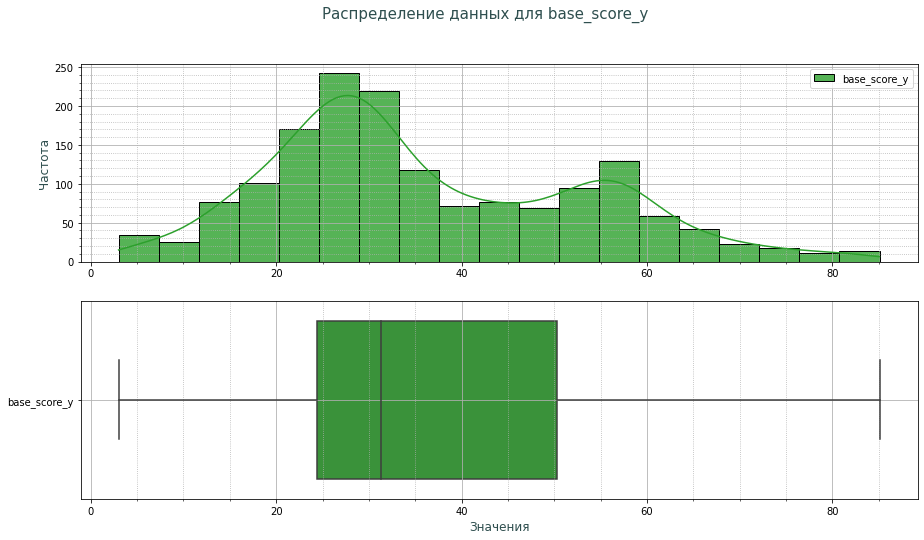

count    1591.000000
mean       36.225927
std        16.816710
min         3.000000
25%        24.410000
50%        31.300000
75%        50.295000
max        85.100000
Name: base_score_y, dtype: float64
components_score_x:


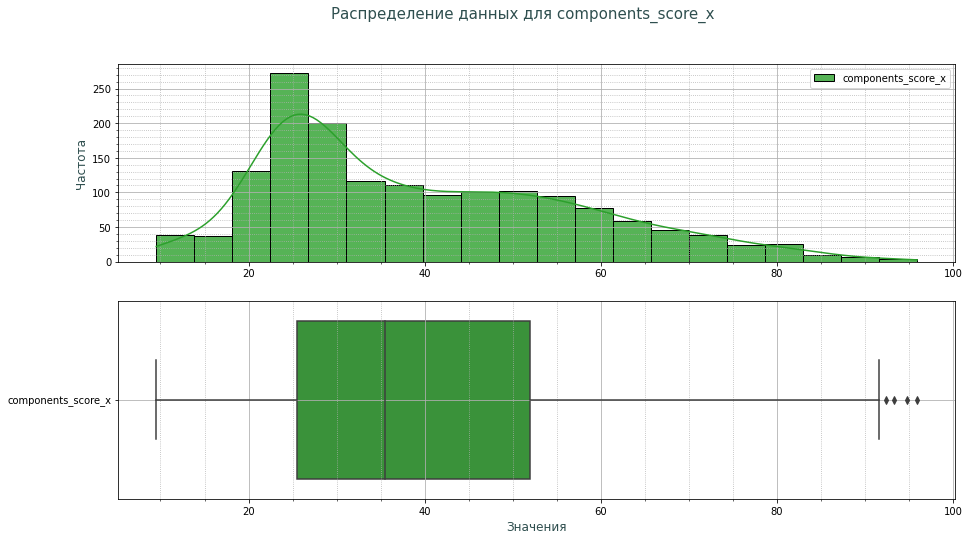

count    1591.000000
mean       39.692018
std        17.629613
min         9.520000
25%        25.485000
50%        35.490000
75%        51.970000
max        95.900000
Name: components_score_x, dtype: float64
total_score_x:


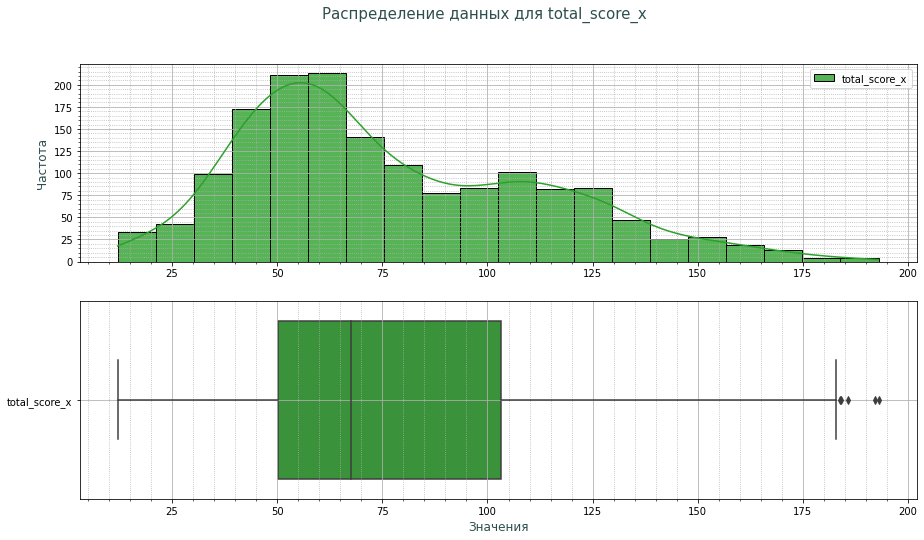

count    1591.000000
mean       76.971383
std        35.417568
min        12.050000
25%        50.265000
50%        67.470000
75%       103.320000
max       192.990000
Name: total_score_x, dtype: float64
elements_score_x:


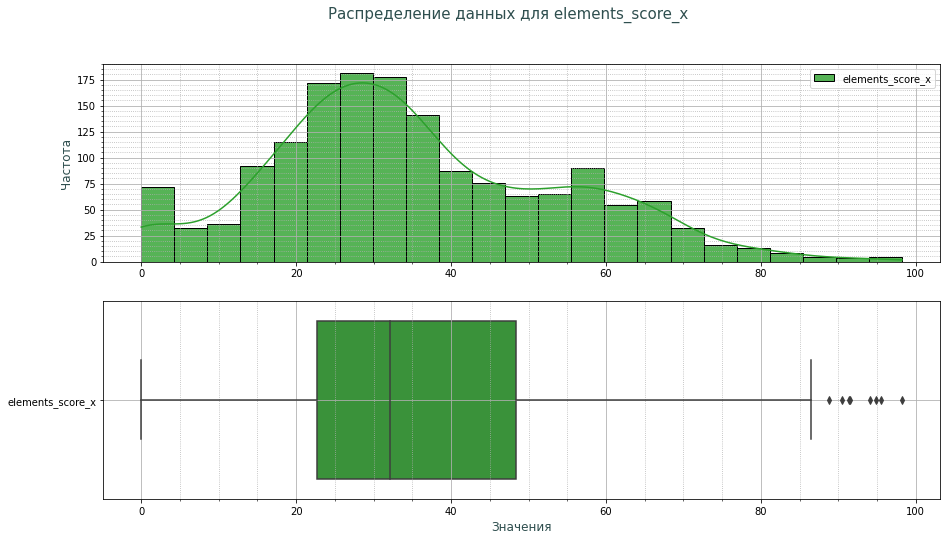

count    1591.000000
mean       35.254023
std        18.862198
min         0.000000
25%        22.645000
50%        32.180000
75%        48.355000
max        98.240000
Name: elements_score_x, dtype: float64
decreasings_score_x:
В столбце decreasings_score_x одно и то же значение, график не строится.
starting_place_x:


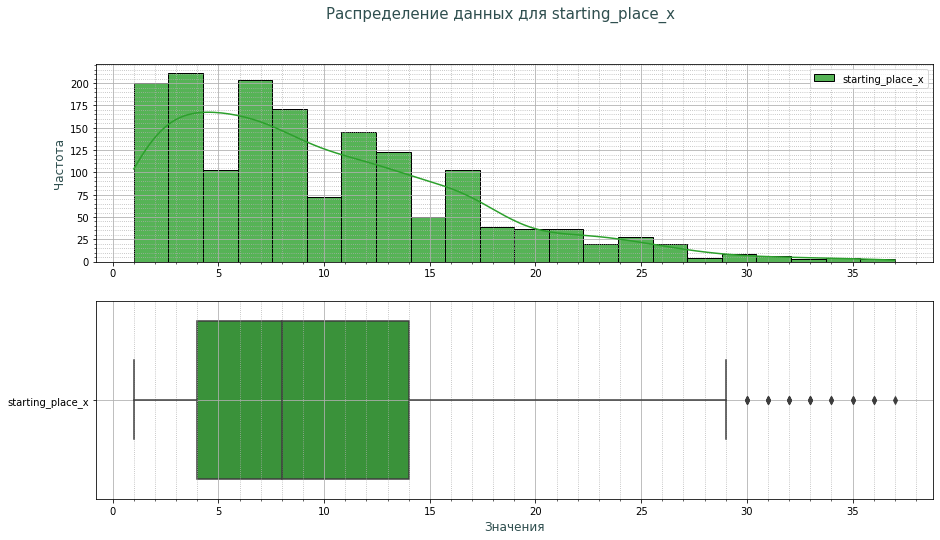

count    1591.000000
mean        9.820239
std         6.883057
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        37.000000
Name: starting_place_x, dtype: float64
place_x:


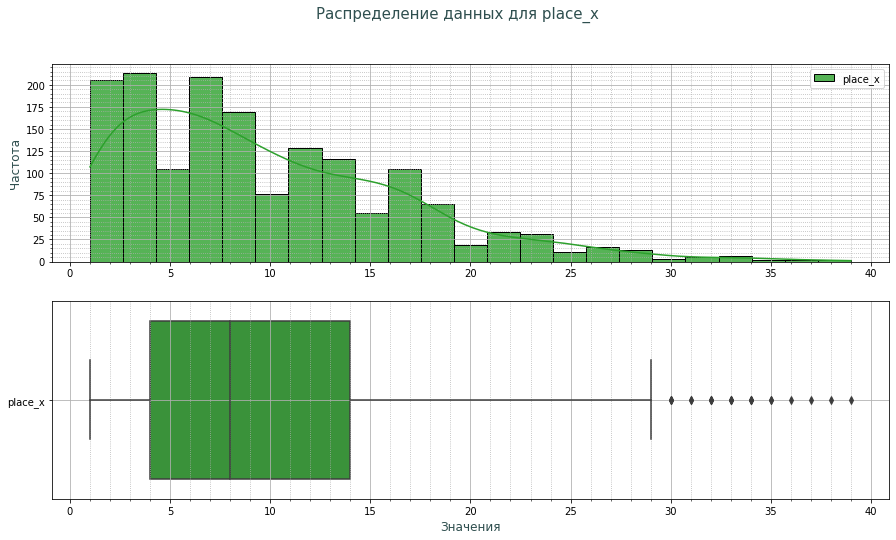

count    1591.000000
mean        9.750471
std         6.927746
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        39.000000
Name: place_x, dtype: float64
overall_place_x:


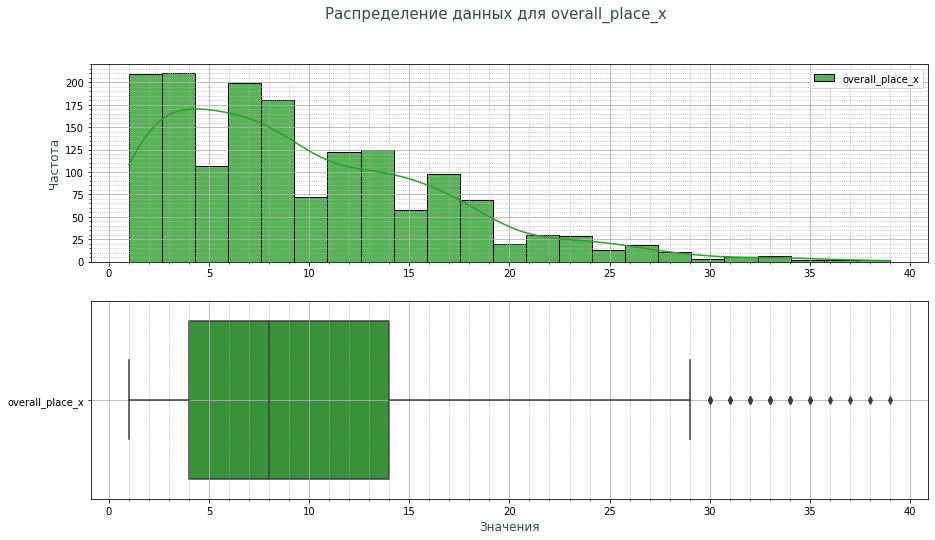

count    1591.000000
mean        9.746072
std         6.918911
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        39.000000
Name: overall_place_x, dtype: float64
overall_total_score_x:


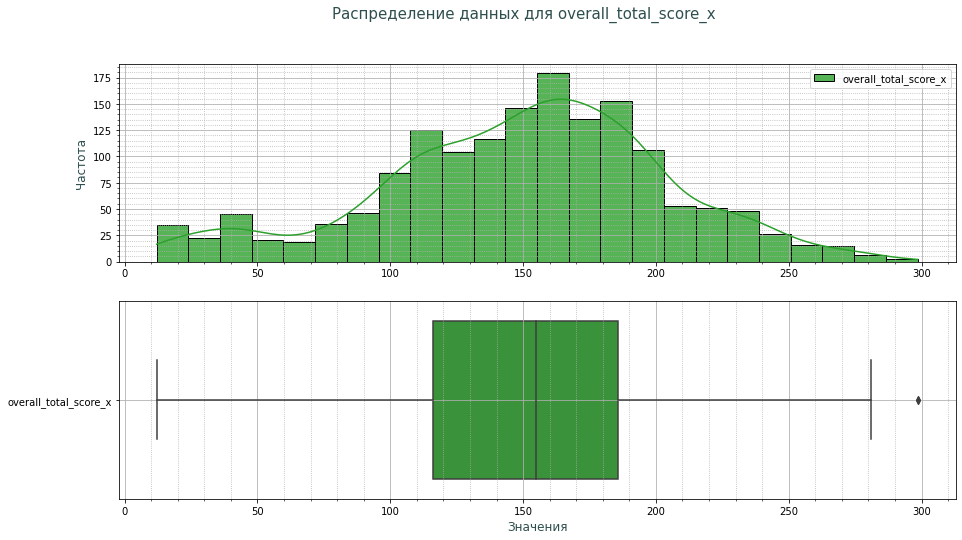

count    1591.000000
mean      149.583872
std        54.225891
min        12.050000
25%       115.975000
50%       154.770000
75%       185.835000
max       298.490000
Name: overall_total_score_x, dtype: float64
unit_id_y:


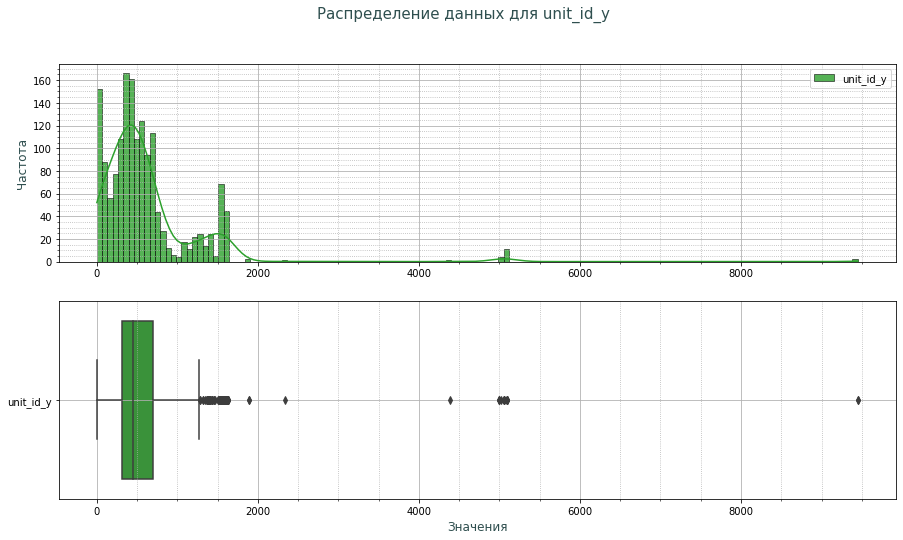

count    1591.000000
mean      609.037084
std       691.528973
min         1.000000
25%       307.500000
50%       454.000000
75%       693.000000
max      9450.000000
Name: unit_id_y, dtype: float64
tournament_id_y:


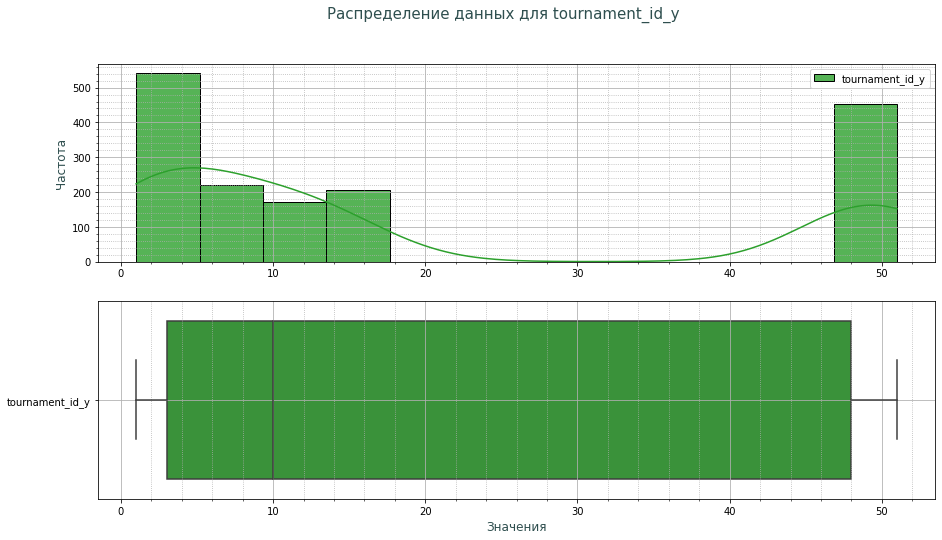

count    1591.000000
mean       18.931490
std        19.653341
min         1.000000
25%         3.000000
50%        10.000000
75%        48.000000
max        51.000000
Name: tournament_id_y, dtype: float64
base_score:


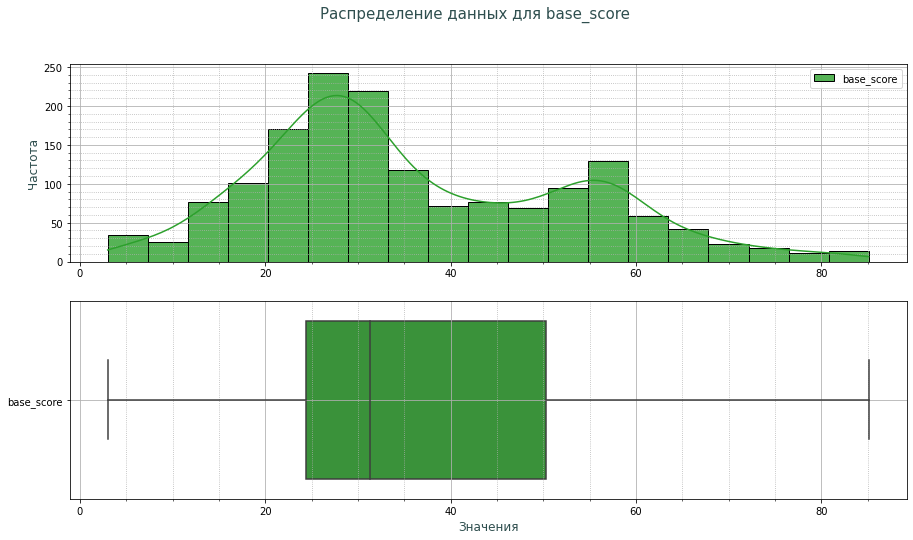

count    1591.000000
mean       36.225927
std        16.816710
min         3.000000
25%        24.410000
50%        31.300000
75%        50.295000
max        85.100000
Name: base_score, dtype: float64
components_score_y:


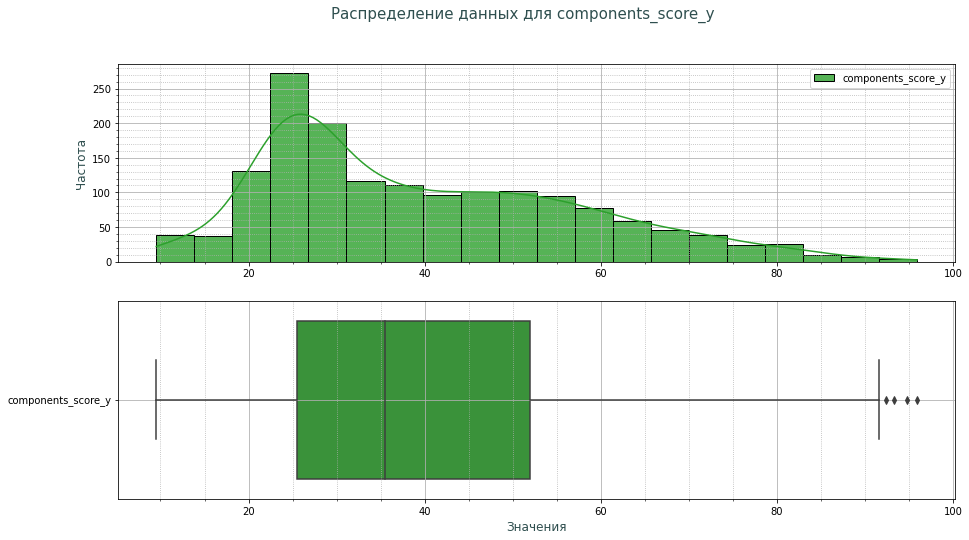

count    1591.000000
mean       39.692018
std        17.629613
min         9.520000
25%        25.485000
50%        35.490000
75%        51.970000
max        95.900000
Name: components_score_y, dtype: float64
total_score_y:


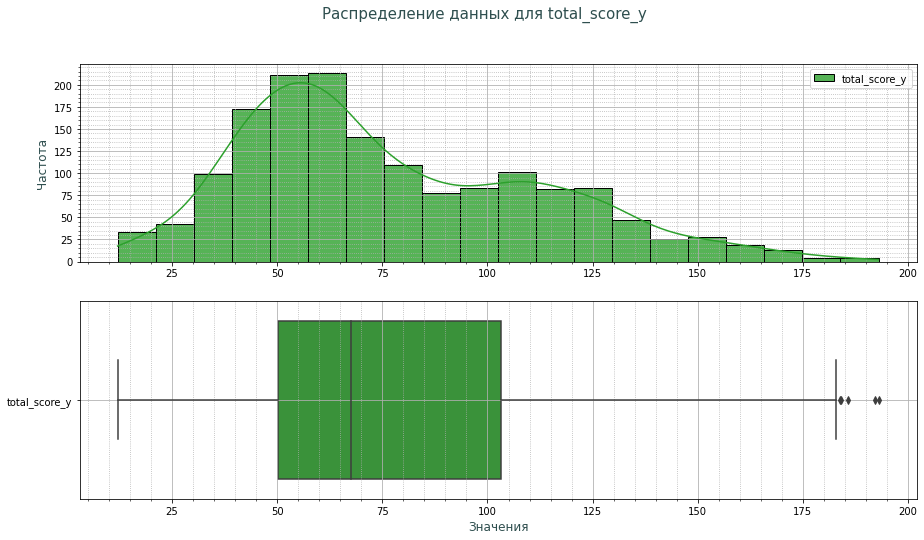

count    1591.000000
mean       76.971383
std        35.417568
min        12.050000
25%        50.265000
50%        67.470000
75%       103.320000
max       192.990000
Name: total_score_y, dtype: float64
elements_score_y:


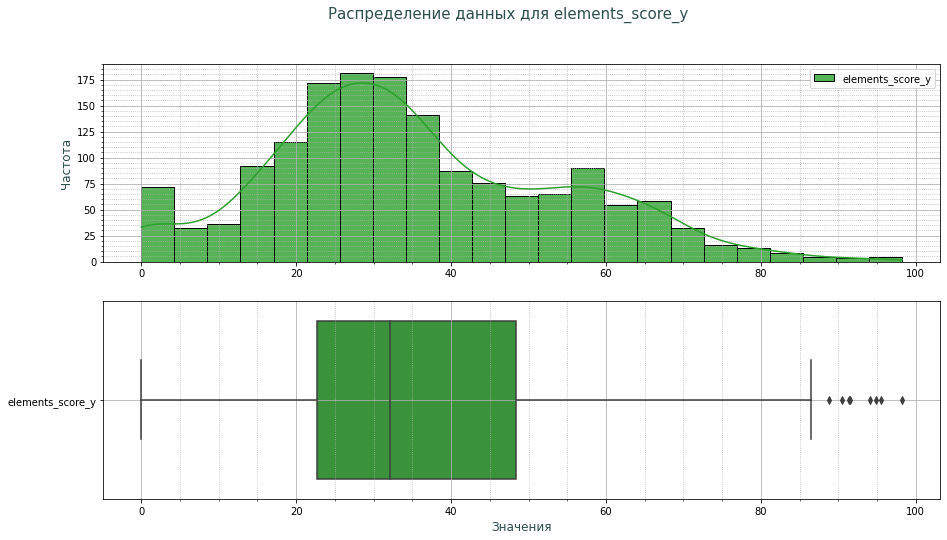

count    1591.000000
mean       35.254023
std        18.862198
min         0.000000
25%        22.645000
50%        32.180000
75%        48.355000
max        98.240000
Name: elements_score_y, dtype: float64
decreasings_score_y:
В столбце decreasings_score_y одно и то же значение, график не строится.
starting_place_y:


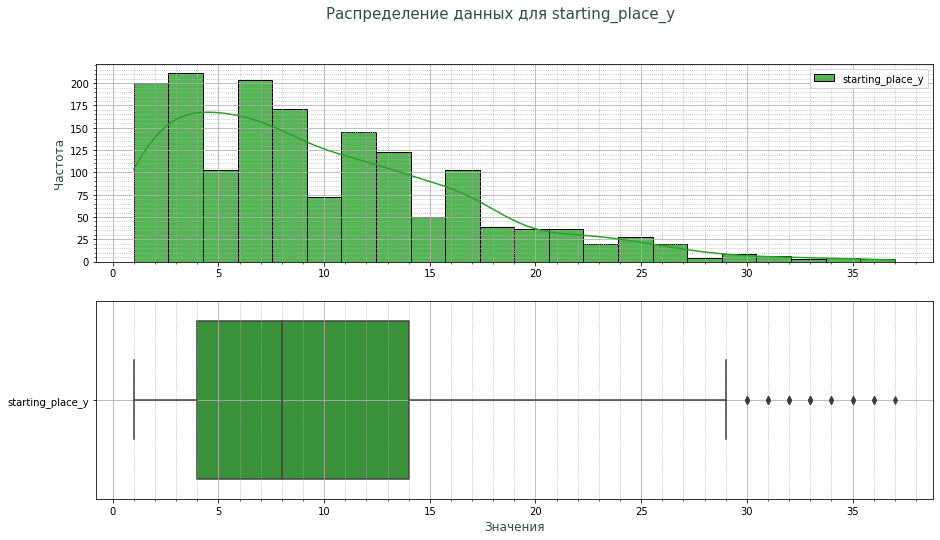

count    1591.000000
mean        9.820239
std         6.883057
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        37.000000
Name: starting_place_y, dtype: float64
place_y:


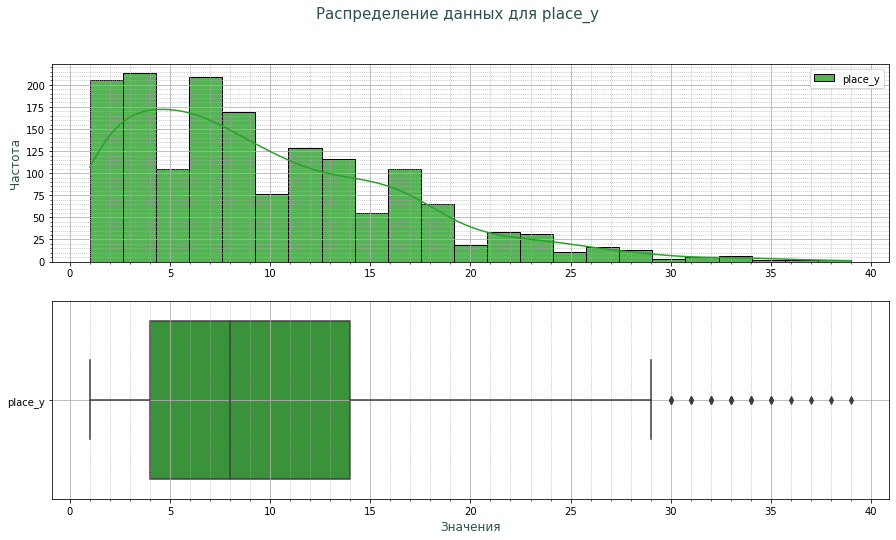

count    1591.000000
mean        9.750471
std         6.927746
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        39.000000
Name: place_y, dtype: float64
overall_place_y:


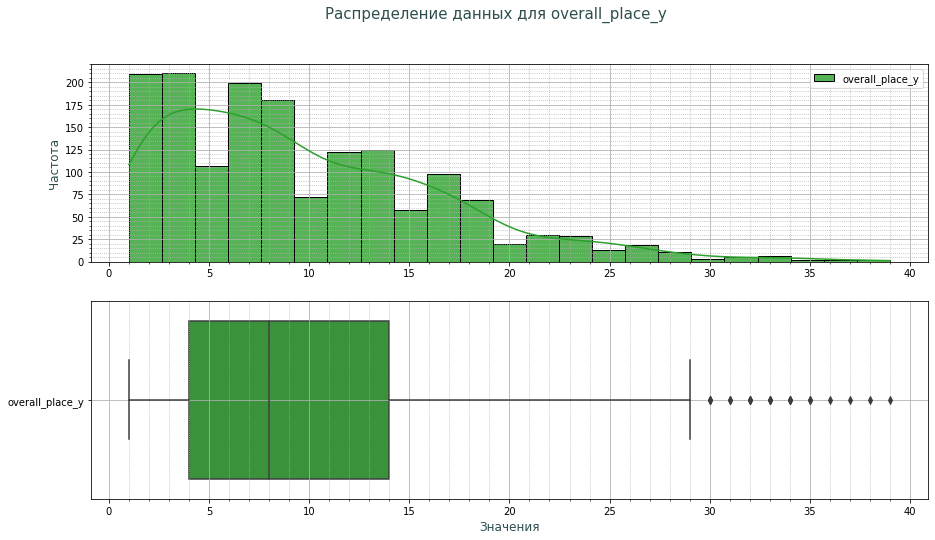

count    1591.000000
mean        9.746072
std         6.918911
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        39.000000
Name: overall_place_y, dtype: float64
overall_total_score_y:


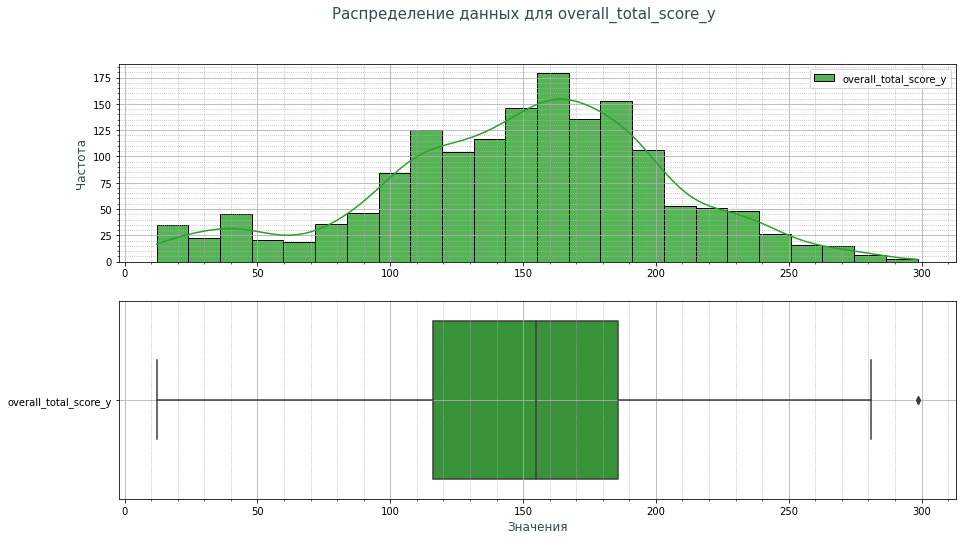

count    1591.000000
mean      149.583872
std        54.225891
min        12.050000
25%       115.975000
50%       154.770000
75%       185.835000
max       298.490000
Name: overall_total_score_y, dtype: float64

Визуализация уникальных значений категориальных столбцов:
color:
Количество категорий: 2


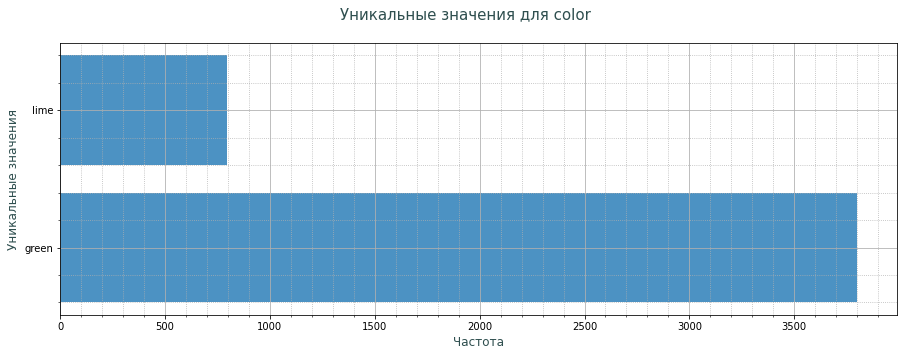

Уникальные значения:
green    3800
lime      795
Name: color, dtype: int64
title:
Количество категорий: 501
Слишком много уникальных значений (501) для title, график не построен.
Уникальные значения:
2A            243
CCoSp4        217
ChSq1         207
CCoSp3        163
3Lo           140
             ... 
2F<+2Tq         1
2F!<<+2Lo<      1
3Feq            1
2S<+1Lo*        1
3Lo+2A          1
Name: title, Length: 501, dtype: int64
decrease:
Количество категорий: 16


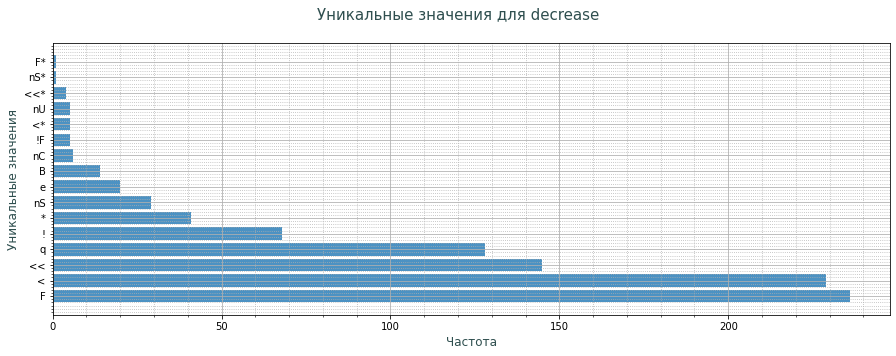

Уникальные значения:
F      236
<      229
<<     145
q      128
!       68
*       41
nS      29
e       20
B       14
nC       6
!F       5
<*       5
nU       5
<<*      4
nS*      1
F*       1
Name: decrease, dtype: int64
segment_name_x:
Количество категорий: 7


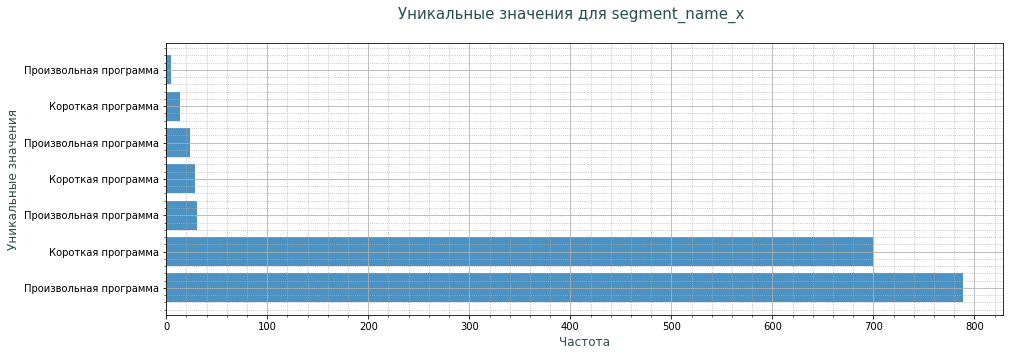

Уникальные значения:
Произвольная программа    789
Короткая программа        700
Прoизвольная прoграмма     30
Кoроткая программа         29
Пpoизвольная программа     24
Коpоткая программа         14
Пpoизвольнaя программа      5
Name: segment_name_x, dtype: int64
info_x:
Количество категорий: 287
Слишком много уникальных значений (287) для info_x, график не построен.
Уникальные значения:
x Надбавка за прыжки во второй половине программы (10%)                                                                                                                                               243
q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%)                                                                                                                  76
< Недокрученный прыжок x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе                                                                                                    71
x

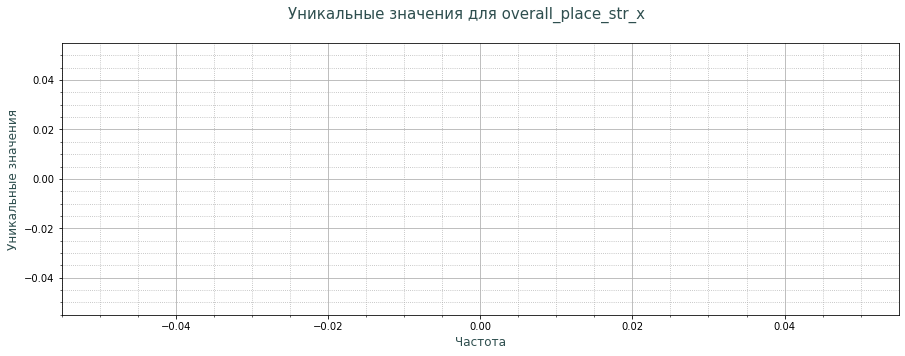

Уникальные значения:
Series([], Name: overall_place_str_x, dtype: int64)
segment_name_y:
Количество категорий: 7


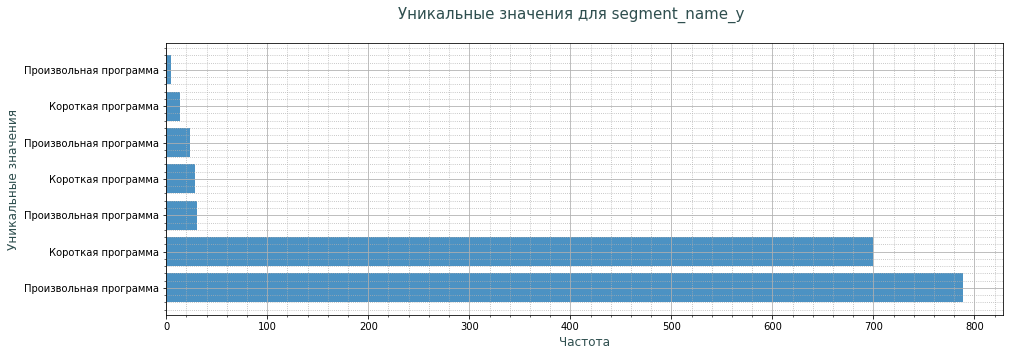

Уникальные значения:
Произвольная программа    789
Короткая программа        700
Прoизвольная прoграмма     30
Кoроткая программа         29
Пpoизвольная программа     24
Коpоткая программа         14
Пpoизвольнaя программа      5
Name: segment_name_y, dtype: int64
info_y:
Количество категорий: 287
Слишком много уникальных значений (287) для info_y, график не построен.
Уникальные значения:
x Надбавка за прыжки во второй половине программы (10%)                                                                                                                                               243
q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%)                                                                                                                  76
< Недокрученный прыжок x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе                                                                                                    71
x

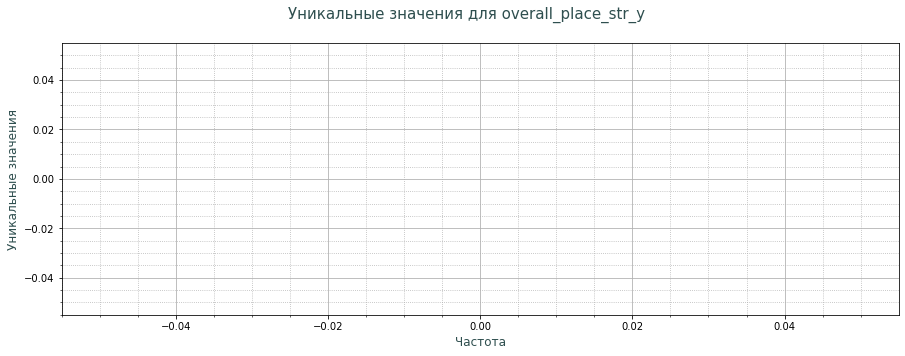

Уникальные значения:
Series([], Name: overall_place_str_y, dtype: int64)


In [25]:
data_review(final_df)